# Packages

The main feature of Python is its extensive collection of packages that enhance its functionality. On this page, we will explore various aspects of working with some of these packages.

**Note:** Some packages have dedicated sections.

The table below lists the most useful python packages whose names are easy to forgot.

| Package         | Purpose / Goal                                  | Install Command             | Docs Link                                       |
| --------------- | ----------------------------------------------- | --------------------------- | ----------------------------------------------- |
| `pyperclip`     | Copy/paste clipboard cross-platform             | `pip install pyperclip`     | [Docs](https://pypi.org/project/pyperclip/)     |
| `python-dotenv` | Load `.env` file into environment variables     | `pip install python-dotenv` | [Docs](https://pypi.org/project/python-dotenv/) |
| `rich`          | Pretty terminal output (text, tables, markdown) | `pip install rich`          | [Docs](https://rich.readthedocs.io/)            |
| `typer`         | Build beautiful CLI apps with minimal code      | `pip install typer`         | [Docs](https://typer.tiangolo.com/)             |
| `pydantic`      | Data validation and parsing using Python types  | `pip install pydantic`      | [Docs](https://docs.pydantic.dev/)              |
| `httpx`         | Modern async/sync HTTP client                   | `pip install httpx`         | [Docs](https://www.python-httpx.org/)           |
| `schedule`      | Lightweight job scheduler                       | `pip install schedule`      | [Docs](https://schedule.readthedocs.io/)        |
| `watchdog`      | Watch for file system changes                   | `pip install watchdog`      | [Docs](https://python-watchdog.readthedocs.io/) |
| `click`         | Create command-line interfaces                  | `pip install click`         | [Docs](https://click.palletsprojects.com/)      |
| `loguru`        | Super simple logging                            | `pip install loguru`        | [Docs](https://loguru.readthedocs.io/)          |
| `tabulate`      | Format tables in plain text                     | `pip install tabulate`      | [Docs](https://pypi.org/project/tabulate/)      |
| `tqdm`          | Add progress bars to loops                      | `pip install tqdm`          | [Docs](https://tqdm.github.io/)                 |
| `colorama`      | Cross-platform terminal colors                  | `pip install colorama`      | [Docs](https://pypi.org/project/colorama/)      |
| `validators`    | Validate emails, URLs, IPs, etc.                | `pip install validators`    | [Docs](https://validators.readthedocs.io/)      |
| `filetype`      | Guess file type by content, not extension       | `pip install filetype`      | [Docs](https://pypi.org/project/filetype/)      |
| `humanize`      | Convert numbers/dates to human-readable formats | `pip install humanize`      | [Docs](https://pypi.org/project/humanize/)      |
| `yaspin`        | Pretty terminal spinners                        | `pip install yaspin`        | [Docs](https://github.com/pavdmyt/yaspin)       |
| `icecream`      | Debug print with context (like `ic()`)          | `pip install icecream`      | [Docs](https://github.com/gruns/icecream)       |
| `dateparser`    | Parse natural language dates                    | `pip install dateparser`    | [Docs](https://dateparser.readthedocs.io/)      |
| `shortuuid`     | Short, URL-safe UUIDs                           | `pip install shortuuid`     | [Docs](https://pypi.org/project/shortuuid/)     |


## tqdm

`tqdm` is a package that allows to create progress bars in the terminal using pseudographics. For more details check [specific page](tqdm.ipynb).

---

The following cell demonstrates typical usage of `tqdm`. The `tqdm.tqdm` object wraps an iterable in a `for` loop, so each iteration of the loop increments the progress bar by 1.

In [3]:
import tqdm
for _ in tqdm.tqdm(range(10), ncols=100, desc="my bar"): pass

my bar: 100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 120180.63it/s]


## zipfile

`zipfile` is a package that allows you to operate on ZIP archives in Python.

---

As an example, we'll create a ZIP file using a Linux command line, and then unpack that archive using Python.

The following cell is creating file that we'll use as example.

In [17]:
%%bash
echo "zipped message" > zip_example_file
zip -r archive.zip zip_example_file
rm zip_example_file

  adding: zip_example_file (stored 0%)


Now, using `zipfile.ZipFile`, we'll open the created archive and extract all its contents to the current directory.

In [18]:
from zipfile import ZipFile
with ZipFile("archive.zip") as f:
    f.extractall(".")

Now we can check the contents of the extracted file - it the same like during creation.

In [19]:
!cat zip_example_file

zipped message


After everything is done, don't forget to clear the environment.

In [20]:
%%bash
rm -r zip_example_file archive.zip

## Psutil

`psutil` is a package that allows you to get in python program information about the harware resources used by a Python program. Check details in the [documentation](https://psutil.readthedocs.io/en/latest/) of the tool.

---

The following cell shows code to get information about the RAM used by the program.

In [13]:
import psutil
process = psutil.Process()
(process.memory_info().rss / (1024**2))

62.97265625

To make sure that it really works, the following cell creates a large object and counts the RAM used by the process.

In [ ]:
ans = [0 for _ in range(2**25)]
(process.memory_full_info().rss / (1024**2))

318.97265625

Now the number is much larger. Finally, delete the large object and measure the RAM again.

In [15]:
del ans
(process.memory_full_info().rss / (1024**2))

63.171875

## APScheduler

APScheduler is a package that allows to start and controll processes that will do some jobs according to some triggers.

For more check:

- Official [APScheduler documentation](https://apscheduler.readthedocs.io/en/3.x/index.html). 
- [Corresponding page](apscheduler.ipynb) on this website.

---

The following cell shows how to run the simplest `BackgroundScheduler`. This code will start a process that prints the current time to the console every 3 seconds.

In [1]:
from datetime import datetime
from apscheduler.schedulers.background import BackgroundScheduler
def periodic_task():
    print(datetime.now().time())

scheduler = BackgroundScheduler()
scheduler.add_job(periodic_task, "interval", seconds=3)
scheduler.start()

11:54:38.109044
11:54:41.108479
11:54:44.108156
11:54:47.108562
11:54:50.108621
11:54:53.108557


Stop the scheduler using the `shutdown` method.

In [2]:
scheduler.shutdown()

## Hugging face

Hugging Face is a site that allows you to publish and download models. It’s convenient because you can automate the process using Python scripting. For this, you need the `huggingface-hub` package. Aspects of working with it are discussed on this page.


The first thing you need to do is log in:

`huggingface-cli login --token <your HF token>`

Check the set of tutorials: 
- [LLM course](https://huggingface.co/learn/llm-course/chapter0/1) from hugging face.
- The [transformers](transformers.ipynb) package, provided by the Hugging Face, allows you to use a variety of popular transformer-based models.

## Drawsvg

`drawsvg` is a package that allows you to describe SVG graphics with python code. Check out the [Drawsvg quick reference](https://cduck.github.io/drawsvg/).

---

The following cell shows how to draw a cross on a red background using svg.

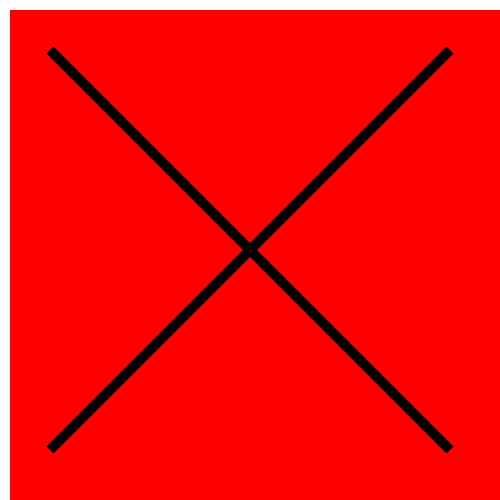

In [1]:
import drawsvg as dw
d = dw.Drawing(500, 500)
d.append(dw.Rectangle(10, 10, 490, 490, fill="red"))
d.append(dw.Line(50, 450, 450, 50, stroke='black', stroke_width=10))
d.append(dw.Line(50, 50, 450, 450, stroke='black', stroke_width=10))
d

As you can see, Jupyter knows how to represent the results of the drawsvg library.

For me, it's typically important to be able to load the corresponding SVG code. Do that with `as_svg` method of the drawsvg canvas.

In [2]:
print(d.as_svg())

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="500" height="500" viewBox="0 0 500 500">
<defs>
</defs>
<rect x="10" y="10" width="490" height="490" fill="red" />
<path d="M50,450 L450,50" stroke="black" stroke-width="10" />
<path d="M50,50 L450,450" stroke="black" stroke-width="10" />
</svg>


### Viewbox

Applying a viewbox can be a bit confusing. This is because original SVG syntax allows for some flexibility. In `drawsvg`, you have to specify exactly `viewBox` name (camel naming) and enter the value as a sting with four numbers separated by the space.

---

The following cell illustrates the use of the `viewBox`. It sets the viewbox to display only a corner of the rectangle added later.

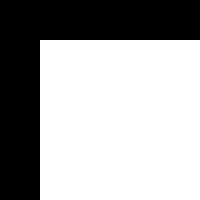

In [40]:
d = dw.Drawing(width=200, height=200, viewBox="-10 -10 100 100")
d.append(dw.Rectangle(
    0, 0, 200, 200,
    fill="none",
    stroke_width=20,
    stroke="black"
))
d